# Setup

In [6]:
import plotly
import plotly.graph_objs as go

import pandas as pd


plotly.offline.init_notebook_mode(connected=True)

# Examples
## Hypotesis per scene

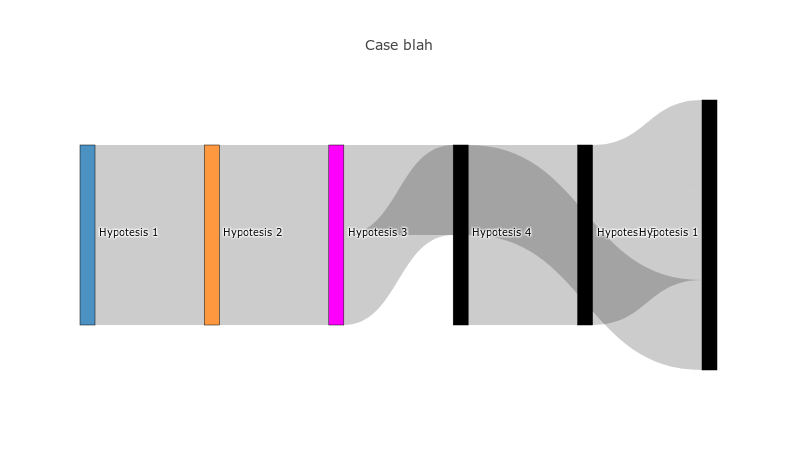

In [15]:


with open('example.json') as json_file:  
    data = json.load(json_file)

data_trace = dict(
    type='sankey',
    width = 1118,
    height = 772,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))

layout =  dict(
    title = "Case blah",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data_trace], layout=layout)
plotly.offline.iplot(fig, validate=False)

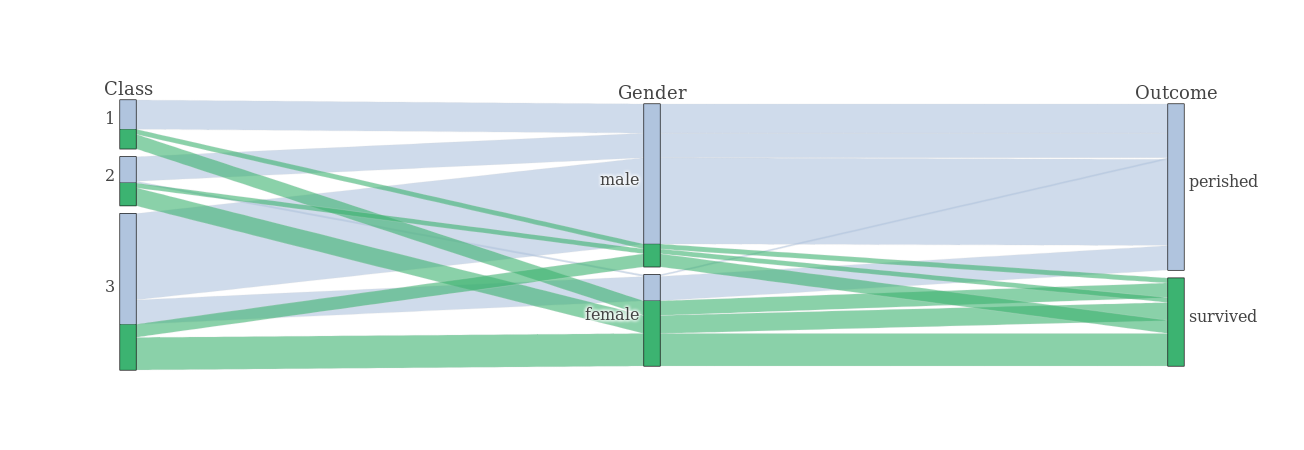

In [3]:

titanic_df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")

# Create dimensions
class_dim = go.parcats.Dimension(
    values=titanic_df.Pclass,
    categoryorder='category ascending',
    label="Class"
)

gender_dim = go.parcats.Dimension(
    values=titanic_df.Sex,
    label="Gender"
)

survival_dim = go.parcats.Dimension(
  values=titanic_df.Survived,
  label="Outcome",
  categoryarray=[0, 1],
  ticktext=['perished', 'survived'],
)

# Create parcats trace
color = titanic_df.Survived;
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

data = [
    go.Parcats(
        dimensions=[class_dim, gender_dim, survival_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='color',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform'
    )
]

# Display figure
plotly.offline.iplot(data)

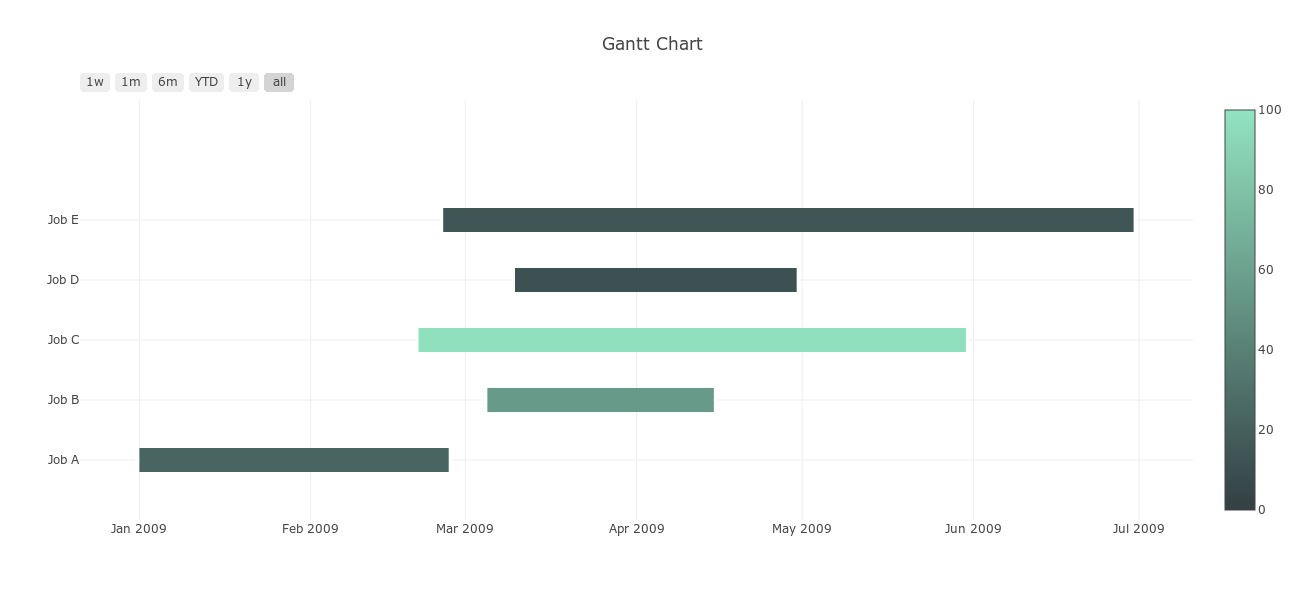

In [7]:
import plotly.figure_factory as ff

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gantt_example.csv')

fig = ff.create_gantt(df, colors=['#333F44', '#93e4c1'], index_col='Complete', show_colorbar=True, bar_width=0.2, showgrid_x=True, showgrid_y=True)
plotly.offline.iplot(fig, filename='gantt-use-a-pandas-dataframe')

In [8]:
df.head()


,Task,Start,Finish,Complete,Resource
0,Job A,2009-01-01,2009-02-26,23,A
1,Job B,2009-03-05,2009-04-15,55,A
2,Job C,2009-02-20 12:40:00,2009-05-30 15:12:44,97,C
3,Job D,2009-03-10,2009-04-30,11,B
4,Job E,2009-02-25,2009-06-30,14,A


In [3]:
from py2neo import Graph
from py2neo import Node
import sys
sys.path.insert(0, '../../resources/')
from scripts.graphdrawer.vis import draw
import urllib, json, urllib.request

url = 'http://cloud.lis.ic.unicamp.br/harena/logger/latest/message'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

target_execution_id = "2019-03-19T00:34:50.726Z-3acd7e11-1a7f-6786-a602-01388934a377"
# target_execution_id = ""

nodes = []
edges = []

node_index=0

for item in data["execution_stream"]:
    topic = item['topic']
    exec_id = topic.split("/")[0]
    if target_execution_id == exec_id:
        
        
        method = topic[topic.index("/"):]
        
        case_id = "no data"
        user_id = "no data"
        try:
            case_id = item['payload']['track']['caseid']
            user_id = item['payload']['track']['userid']
        except:
            pass
        nodes.append({"id":   node_index, "label": method, "title": json.dumps({'case': case_id, 'user':user_id}), "group": topic})
        edges.append({"from": node_index, "label": "THEN", "to": node_index+1})
        node_index+=1
draw(nodes, edges, physics=True)


